# Machine Learning Engineer Nanodegree - Capstone Project
## Starbucks Project

by Arwa Alamoudi - 23/12/2021

---

## Notebook Structure

- [Data Loading](#data-loading)
- [Exploratory Data Analysis](#eda)
    - [Portfolio Overview](#portfolio)
    - [Profile Overview](#profile)
    - [Transcript Overview](#transcript)
    - [Exploring Portfolio, Profile, and Transcript](#all)
- [Data Cleaning](#clean)
    - [Porfolio](#clean_porfolio)
    - [Profile](#clean_profile)
    - [Transcript](#clean_transcript)
- [Feature Engineering and Data Transformation](#FE)
    - [Porfolio](#FE-portfolio)
    - [Profile](#FE-profile)
    - [Transcript](#FE_transcript)
    - [Combined Dataset](#combined)
- [Train-Test Data](#train-test)
- [Benchmark Model](#benchmark-model)
- [Proposed Models](#PM)
- [Evaluation](#eval)
    



---

In [1]:
# load needed packages into Python
!pip install lightgbm
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

----

<a id="data-loading"></a>
## 1. Data Loading

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

---

<a id="eda"></a>
## 2. Exploratory Data Analysis 

<a id="portfolio"></a>
### 2.1 Portfolio Overview
The dataset contains information about the offers sent to the customers during the last 30 days. 

In [3]:
rows, col = portfolio.shape
print(f'There are {rows} rows and {col} columns')

There are 10 rows and 6 columns


In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
# explore columns names and types
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


#### Summary
- The dataset contains 6 fields:
    - reward (numeric): money "in dollar" awarded for the amount spent.
    - channels (list): channels used when sending the offer; web, email, mobile, social.
    - difficulty (numeric): money required to be spent to receive reward.
    - duration (numeric): time for offer to be open, in days.
    - offer type (string): Buy-One-Get-One "bogo", discount, informational.
    - id (string/hash): a unique id for each offer.

- The dataset contains no null values.

    
#### Next Actions
- Transform offer type column (the target).
- Deal with channels column.

<a id="profile"></a>
### 2.2 Profile Overview
The dataset contains information about 17,000 customers. 

In [6]:
rows, col = profile.shape
print(f'There are {rows} rows and {col} columns')

There are 17000 rows and 5 columns


In [7]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [8]:
# explore columns names and types
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [9]:
# number of missing values in each feature
missing = profile.isnull().sum().sort_values(ascending = False).reset_index()
missing.columns = ['Features', 'Missing Values']
missing

,Features,Missing Values
0,income,2175
1,gender,2175
2,became_member_on,0
3,id,0
4,age,0


In [10]:
# missing values in age are encodded as 118, so let's check the number of missing values in age also
profile[profile.age == 118].shape[0]

2175

Since number of missing values in income, gender, and age are the same, we need to ckeck if missing values on them are from the same customers (in the same rows).

In [11]:
# check if null values in income and gender are always in the same rows
profile[profile.income.isnull() & profile.gender.isnull()].shape[0]

2175

In [12]:
# check if null values in age are always in the same rows as income and gender
profile[profile.age == 118].count()

# we can see here that all 2175 customers at age 118 have no registered ‘gender’ and ‘income’, 
# which means null values in income and gender are always in the same rows with age.

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

In [13]:
# descibe numerical columns, excluding missing values in age
profile[profile.age != 118].describe()

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


In [14]:
# check customers' genders
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

#### Some Visualizations

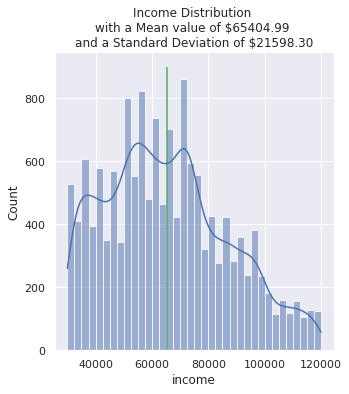

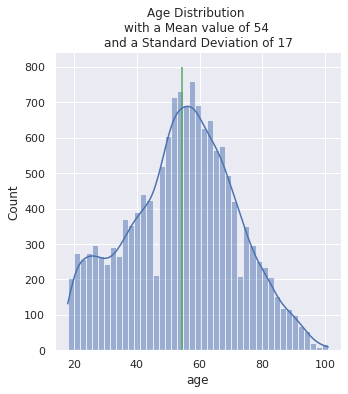

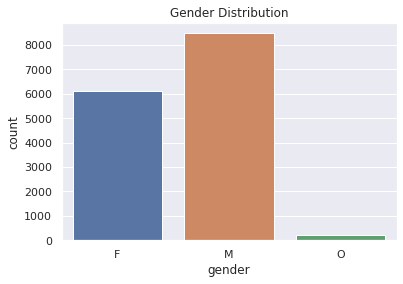

In [15]:
sns.set_theme(style="darkgrid")

# calculate the income mean and standard deviation excluding missing values
income_mean = profile.income.mean()
income_stddev = profile.income.std()

# explore the distribution of income
sns.displot(data=profile, x="income", kde=True)
plt.vlines(income_mean, 0, 900, linestyles ="-", colors ="g")
plt.title(f'Income Distribution \nwith a Mean value of ${income_mean:.2f} \nand a Standard Deviation of ${income_stddev:.2f}');
plt.show()

# calculate the age mean and standard deviation excluding missing values
age_mean = profile[profile.age != 118].age.mean()
age_stddev = profile[profile.age != 118].age.std()

# explore the distribution of age
sns.displot(data=profile[profile.age != 118], x="age", kde=True)
plt.vlines(age_mean, 0, 800, linestyles ="-", colors ="g")
plt.title(f'Age Distribution \nwith a Mean value of {age_mean:.0f} \nand a Standard Deviation of {age_stddev:.0f}');
plt.show()

# explore the distribution of gender
sns.countplot(x="gender", data=profile)
plt.title('Gender Distribution');
plt.show()


#### Summary
- The dataset contains 5 fields:
    - gender (categorical): customer gender; M, F, O, or null.
    - age (numeric): customer age, missing value encoded as 118.
    - id (string/hash): a unique id for each customer.
    - became member on (date): customer joining date, written in format YYYYMMDD.
    - income (numeric): customer income.
- Gender, income, and age fields have 2,175 null values, all in the same rows.
- Customers' income ranges from 30,000 to 120,000 with an average of 65,404 and a standard deviation of 21,598.
- Customers' age ranges from 18 to 101 with an average of 54 and a standard deviation of 17.
- There are 8,484 males, 6,129 females, and 212 others.

#### Next Actions
- Deal with gender column (transformation + missing values).
- Deal with age column (missing values).
- Deal with income column (missing values).
- Change the format of became_member_on column.

<a id="transcript"></a>
### 2.3 Transcript Overview
This dataset contains contains 306,534 offer reaction records.

In [16]:
rows, col = transcript.shape
print(f'There are {rows} rows and {col} columns')

There are 306534 rows and 4 columns


In [17]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [18]:
# explore columns names and types
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [19]:
# number of missing values in each feature
missing = transcript.isnull().sum().sort_values(ascending = False).reset_index()
missing.columns = ['Features', 'Missing Values']
missing

,Features,Missing Values
0,time,0
1,value,0
2,event,0
3,person,0


In [20]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [21]:
# verify that all transcript records belong to the 17,000 customers 
transcript.person.value_counts().count()

17000

In [22]:
# how many order each customers did?
transcript.person.value_counts()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
                                    ..
cae5e211053f4121a389a7da4d631f7f     2
3045af4e98794a04a5542d3eac939b1f     2
22617705eec442e0b7b43e5c5f56fb17     2
e63e42480aae4ede9f07cac49c8c3f78     2
da7a7c0dcfcb41a8acc7864a53cf60fb     1
Name: person, Length: 17000, dtype: int64

In [23]:
# get the counts of all event types
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

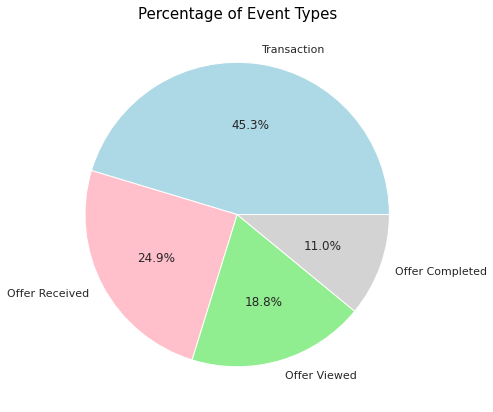

In [24]:
# percentage of event types
labels = ['Transaction', 'Offer Received', 'Offer Viewed', 'Offer Completed']
colors = ['lightblue','pink', 'lightgreen', 'lightgrey']
explode = [0,0,0,0]
sizes = transcript.event.value_counts().values

# Visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%');
plt.title('Percentage of Event Types',color = 'black',fontsize = 15);

In [25]:
# explore the distribution of event types
event_list = ['transaction', 'offer received', 'offer viewed', 'offer completed']

for e in event_list:
    new = transcript[transcript.event == e]
    event_frq = pd.value_counts(new['value'].astype('str')).to_frame()
    event = pd.concat([event_frq, (event_frq/new.value.count()*100)], axis=1)
    event.columns = ['Count', 'Relative Freq.']
    print(e + ' - ',event.Count.sum())
    
    display(event)

transaction -  138953


,Count,Relative Freq.
{'amount': 0.05},431,0.310177
{'amount': 0.66},166,0.119465
{'amount': 1.18},165,0.118745
{'amount': 1.01},163,0.117306
{'amount': 1.23},161,0.115867
...,...,...
{'amount': 601.64},1,0.000720
{'amount': 44.58},1,0.000720
{'amount': 49.38},1,0.000720
{'amount': 49.59},1,0.000720


offer received -  76277


,Count,Relative Freq.
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},7677,10.064633
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},7668,10.052834
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},7658,10.039724
{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},7646,10.023992
{'offer id': '2906b810c7d4411798c6938adc9daaa5'},7632,10.005637
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},7618,9.987283
{'offer id': '3f207df678b143eea3cee63160fa8bed'},7617,9.985972
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},7597,9.959752
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},7593,9.954508
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},7571,9.925666


offer viewed -  57725


,Count,Relative Freq.
{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},7337,12.710264
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},7327,12.692941
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},7298,12.642702
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},7264,12.583803
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},6716,11.634474
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},6687,11.584236
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},4171,7.225639
{'offer id': '3f207df678b143eea3cee63160fa8bed'},4144,7.178865
{'offer id': '2906b810c7d4411798c6938adc9daaa5'},4118,7.133824
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},2663,4.613252


offer completed -  33579


,Count,Relative Freq.
"{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",5317,15.834301
"{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}",5156,15.354835
"{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",4354,12.966437
"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",4296,12.793710
"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",4017,11.962834
"{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd', 'reward': 10}",3688,10.983055
"{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7', 'reward': 5}",3420,10.184937
"{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0', 'reward': 10}",3331,9.919890


#### Summary
- The dataset contains 4 fields:
    - person (string/hash): an id correspond to customer id.
    - event (string): offer received, offer viewed, transaction, offer completed.
    - value (dictionary): different values depending on event type:
        - offer id (string/hash): id not associated with any ”transaction”.
        - amount (numeric): money spent in ”transaction”.
        - reward (numeric): money gained from ”offer completed”.
    - time (numeric): hours after start of test.
- The dataset contains no null values.
- All 10 offers were sent to customers almost equally.
- All 10 offers were not equally viewed by customers.
- BOGO and discount offers were completed by the customers with different interests. 
- The dataset is balanced by looking at the value counts for all transcript completed offers. 

#### Next Actions
- Deal with event column (categorical).
- Deal with value column.

<a id="all"></a>
### 2.4 Exploring Portfolio, Profile, and Transcript
Here I would like to explore more about the three datasets together

In [26]:
# check the profile of the most active customer
profile[profile.id == '94de646f7b6041228ca7dec82adb97d2']

,gender,age,id,became_member_on,income
3108,M,27,94de646f7b6041228ca7dec82adb97d2,20140126,33000.0


In [27]:
# check all the 50 orders of the most active customer
transcript[transcript.person == '94de646f7b6041228ca7dec82adb97d2']

,person,event,value,time
2276,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
16010,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6
24531,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 7.41},30
24532,94de646f7b6041228ca7dec82adb97d2,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,30
42252,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 1.47},102
55475,94de646f7b6041228ca7dec82adb97d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},168
75256,94de646f7b6041228ca7dec82adb97d2,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},186
77624,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 2.62},192
81725,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 0.59},204
93913,94de646f7b6041228ca7dec82adb97d2,transaction,{'amount': 2.2800000000000002},246


In [28]:
# check how many times did he benefit from the offers 
transcript[transcript.person == '94de646f7b6041228ca7dec82adb97d2'].event.value_counts()

transaction        35
offer received      6
offer viewed        5
offer completed     5
Name: event, dtype: int64

In [29]:
# the most used offer was sent with all 4 channels
portfolio[portfolio.id == 'fafdcd668e3743c1bb461111dcafc2a4'].channels

6    [web, email, mobile, social]
Name: channels, dtype: object

#### Summary
- After tracking a customer records for 30 days, I noticed:
    - Not all received offers were viewed before completed, some customers completed the offer immediately after receiving it (check ids 113102 and 198780).
    - Completed offers are always linked to a received offer and/or a viewed offer, so when combining profile, portfolio, and transaction datasets, received and viewed offer records for the same customer will hold the same information as completed offer of the same customer.
    - So, to consider a customer as influenced by an offer, the customer must complete an offer. So I will only consider completed offer in the final (merged) dataset.

---

<a id="clean"></a>
## 3. Data Cleaning 
This section provides cleaning and pre-processing the data frames based on the results and observations obtained in [step 2](#eda).

<a id="clean_porfolio"></a>
### 3.1 Portfolio¶

porfolio dataset is almost clean, it has no null values or incomplete data. I will only do the following for better representation of the dataset:
- rename column names.
- move id column to the begining of the dataset.  


In [30]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [31]:
# rename column names
portfolio.rename(columns={'reward': 'offer_reward', 'difficulty': 'offer_difficulty',\
                          'duration': 'offer_duration' ,'id': 'offer_id'}, inplace=True)

# move offer_id column to the begining of the dataset
portfolio = portfolio[['offer_id'] + [ col for col in portfolio.columns if col != 'offer_id' ]]

In [32]:
portfolio

,offer_id,offer_reward,channels,offer_difficulty,offer_duration,offer_type
0,ae264e3637204a6fb9bb56bc8210ddfd,10,"[email, mobile, social]",10,7,bogo
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"[web, email, mobile, social]",10,5,bogo
2,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
5,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"[web, email, mobile, social]",7,7,discount
6,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount
7,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational
8,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo
9,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount


<a id="clean_profile"></a>
### 3.2 Profile

For profile dataset, I will do the following:
- change "118" value in age column to NaN.
- fill the missing values in age by the mean.
- fill the missing values in income by the mean.
- fill the missing values in gender by "O".
- rename column names.
- move the id column to the beginning of the dataset.

In [33]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [34]:
# change "118" value in age column to None
profile['age'] = profile['age'].apply(lambda x: np.nan if x == 118 else x)

In [35]:
# fill the missing values in age by the mean
profile.age.fillna(profile.age.mean(), inplace=True)

In [36]:
# fill the missing values in income by the mean
profile.income.fillna(profile.income.mean(), inplace=True)

In [37]:
# fill the missing values in gender by "O"
profile.gender.fillna('O', inplace=True)

In [38]:
# rename column names
profile.rename(columns={'id': 'customer_id', 'became_member_on': 'member_since'}, inplace=True)

# move offer_id column to the begining of the dataset
profile = profile[['customer_id'] + [ col for col in profile.columns if col != 'customer_id' ]]

In [39]:
profile

,customer_id,gender,age,member_since,income
0,68be06ca386d4c31939f3a4f0e3dd783,O,54.393524,20170212,65404.991568
1,0610b486422d4921ae7d2bf64640c50b,F,55.000000,20170715,112000.000000
2,38fe809add3b4fcf9315a9694bb96ff5,O,54.393524,20180712,65404.991568
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.000000,20170509,100000.000000
4,a03223e636434f42ac4c3df47e8bac43,O,54.393524,20170804,65404.991568
...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,F,45.000000,20180604,54000.000000
16996,2cb4f97358b841b9a9773a7aa05a9d77,M,61.000000,20180713,72000.000000
16997,01d26f638c274aa0b965d24cefe3183f,M,49.000000,20170126,73000.000000
16998,9dc1421481194dcd9400aec7c9ae6366,F,83.000000,20160307,50000.000000


<a id="clean_transcript"></a>
### 3.3 Transcript

Transcript dataset has no null values, I will only do the following for better representation of the dataset:
- rename some column names.
- move id column to the begining of the dataset.

In [40]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [41]:
# rename column names
transcript.rename(columns={'person': 'customer_id', 'time': 'time_h'}, inplace=True)

# move offer_id column to the begining of the dataset
transcript = transcript[['customer_id'] + [ col for col in transcript.columns if col != 'customer_id' ]]

In [42]:
transcript

,customer_id,event,value,time_h
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


----

<a id="FE"></a>
## 4. Feature Engineering and Data Transformation

This section will transform the categorical features in all datasets and prepare the data for modeling step

<a id="FE-portfolio"></a>
### 4.1 Protfolio

The following points will be addressed in this section:
- replace the'offer_id' by more easy ids.
- set 'offer_id' as index.
- change the unit of 'offer_duration' column from days to hours.
- rename 'offer_duration' column to 'offer_duration_h' representing that the unit of measurment is 'hours'.
- normalize 'offer_difficulty', 'offer_reward', and 'offer_duration_h' features using the MinMaxScaler.
- create dummy variables from the 'channels' column using one-hot encoding then drop the 'channels' column.
- remove email column. 
- replace the 'offer_type' by integers representing each offer type as follow: 0 for bogo and 1 for discount.

In [43]:
portfolio

,offer_id,offer_reward,channels,offer_difficulty,offer_duration,offer_type
0,ae264e3637204a6fb9bb56bc8210ddfd,10,"[email, mobile, social]",10,7,bogo
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"[web, email, mobile, social]",10,5,bogo
2,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
5,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"[web, email, mobile, social]",7,7,discount
6,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount
7,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational
8,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo
9,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount


In [44]:
# replace the offer_id by more easy ids
labels_offer_id = portfolio['offer_id'].astype('category').cat.categories.tolist()
replace_map_comp_offer_id = {'offer_id' : {k: v for k,v in zip(labels_offer_id,list(range(1,len(labels_offer_id)+1)))}}
portfolio.replace(replace_map_comp_offer_id, inplace=True)

In [45]:
# set offer_id as index
portfolio.set_index(keys='offer_id', verify_integrity=True, inplace=True)

In [46]:
# change the unit of offer_duration column from days to hours
portfolio['offer_duration'] = portfolio['offer_duration']*24

# rename offer_duration column to offer_duration_h representing that the unit of measurment is 'hours'
portfolio.rename(columns={'offer_duration': 'offer_duration_h'}, inplace=True)

In [47]:
# normalize offer_difficulty and offer_reward features using the MinMaxScaler
scaler = MinMaxScaler() 
numerical = ['offer_difficulty','offer_reward', 'offer_duration_h']
portfolio[numerical] = scaler.fit_transform(portfolio[numerical])

In [48]:
# create dummy variables from the channels column using one-hot encoding then drop the channels' column
s = portfolio['channels']
mlb = MultiLabelBinarizer()
portfolio = pd.concat([portfolio, pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=portfolio.index)], axis = 1)
portfolio.drop(columns='channels', inplace=True)

In [49]:
# check if all offers were sent via email
portfolio.email.sum()

10

In [50]:
# since all offers were sent via email, this column is not meaningful, thus I will remove it
portfolio.drop(columns='email', inplace=True)

In [51]:
# since there were no completed records for informational offer, I will drop informational offers
portfolio.drop(portfolio.loc[portfolio['offer_type'] == 'informational'].index, inplace=True)

In [52]:
portfolio_multi = portfolio.copy()

In [53]:
# replace the offer_type by integers representing each offer type as follow: 
# 0 for bogo and 1 for discount

# create dictionary of category to integer mapping
cat = {'bogo':0, 
       'discount':1}
    
# apply using map
portfolio['offer_type'] = portfolio.offer_type.map(cat)  

In [54]:
portfolio

,offer_reward,offer_difficulty,offer_duration_h,offer_type,mobile,social,web
offer_id,,,,,,,
8,1.0,0.50,0.571429,0,1,1,0
5,1.0,0.50,0.285714,0,1,1,1
7,0.5,0.25,0.571429,0,1,0,1
1,0.5,1.00,1.000000,1,0,0,1
2,0.3,0.35,0.571429,1,1,1,1
10,0.2,0.50,1.000000,1,1,1,1
9,0.5,0.25,0.285714,0,1,1,1
3,0.2,0.50,0.571429,1,1,0,1


<a id="FE-profile"></a>
### 4.2 Profile

The following points will be addresses in this section:
- replace the'customer_id' by more easy ids.
- set 'customer_id' as index.
- create dummy variables from the 'gender' column using one-hot encoding then drop the 'gender' column.
- convert member_since into a better format.
- normalize 'age', 'income', and 'membership total days' features using the MinMaxScaler.

In [55]:
profile

,customer_id,gender,age,member_since,income
0,68be06ca386d4c31939f3a4f0e3dd783,O,54.393524,20170212,65404.991568
1,0610b486422d4921ae7d2bf64640c50b,F,55.000000,20170715,112000.000000
2,38fe809add3b4fcf9315a9694bb96ff5,O,54.393524,20180712,65404.991568
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.000000,20170509,100000.000000
4,a03223e636434f42ac4c3df47e8bac43,O,54.393524,20170804,65404.991568
...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,F,45.000000,20180604,54000.000000
16996,2cb4f97358b841b9a9773a7aa05a9d77,M,61.000000,20180713,72000.000000
16997,01d26f638c274aa0b965d24cefe3183f,M,49.000000,20170126,73000.000000
16998,9dc1421481194dcd9400aec7c9ae6366,F,83.000000,20160307,50000.000000


In [56]:
# replace the customer_id by more easy ids
labels_customer_id = profile['customer_id'].astype('category').cat.categories.tolist()
replace_map_comp_customer_id = {'customer_id' : {k: v for k,v in zip(labels_customer_id,list(range(1,len(labels_customer_id)+1)))}}
profile.replace(replace_map_comp_customer_id, inplace=True)

In [57]:
# set customer_id as index
profile.set_index(keys='customer_id', verify_integrity=True, inplace=True)

In [58]:
# create dummy variables from the gender column using one-hot encoding then drop the gender column
profile = pd.concat([profile, pd.get_dummies(profile["gender"])], axis = 1)
profile.drop(columns='gender', inplace=True)

In [59]:
# calculate number of days customer has been member and store in membership_total_days
profile['membership_total_days'] = profile.member_since.apply(lambda dt: (datetime.today() - datetime.strptime(str(dt), "%Y%m%d")).days)
    
# store the year they became member on
profile['membership_year'] = profile.member_since.apply(lambda dt: int(str(dt)[:4]))

profile.drop(columns='member_since', inplace=True)

In [60]:
# normalize age, income, and membership total days features using the MinMaxScaler
scaler = MinMaxScaler() 
numerical = ['age', 'income', 'membership_total_days']
profile[numerical] = scaler.fit_transform(profile[numerical])

In [61]:
profile

,age,income,F,M,O,membership_total_days,membership_year
customer_id,,,,,,,
6962,0.438476,0.393389,0,0,1,0.290181,2017
399,0.445783,0.911111,1,0,0,0.206253,2017
3747,0.438476,0.393389,0,0,1,0.007680,2018
7997,0.686747,0.777778,1,0,0,0.243006,2017
10736,0.438476,0.393389,0,0,1,0.195283,2017
...,...,...,...,...,...,...,...
7265,0.325301,0.266667,1,0,0,0.028524,2018
2888,0.518072,0.466667,0,1,0,0.007131,2018
106,0.373494,0.477778,0,1,0,0.299506,2017


<a id="FE_transcript"></a>
### 4.3 Transcript

The following points will be addresses in this section:
- drop transaction, offer received, and offer viewed rows.
- drop event column.
- replace the'customer_id' with the ids created before.
- pop the 'value' column and create 'offer_id' and 'reward' columns, then drop 'value' column.
- normalize 'reward' and 'time_h' features using the MinMaxScaler.
- replace the'offer_id' with the ids created before.

In [62]:
transcript

,customer_id,event,value,time_h
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [63]:
# drop transaction, offer received, and offer viewed rows
transcript.drop(transcript.loc[transcript['event']=='offer received'].index, inplace=True)
transcript.drop(transcript.loc[transcript['event']=='offer viewed'].index, inplace=True)
transcript.drop(transcript.loc[transcript['event']=='transaction'].index, inplace=True)

In [64]:
# drop event column since all are completed
transcript.drop(columns='event', inplace=True)

In [65]:
# replace the customer_id with the ids created before
transcript.replace(replace_map_comp_customer_id, inplace=True)

In [66]:
# pop the value column and create offer_id and reward column
transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis=1)

In [67]:
transcript.drop(columns='value', inplace=True)

In [68]:
# normalize reward features using the MinMaxScaler
numerical = ['reward', 'time_h']
transcript[numerical] = scaler.fit_transform(transcript[numerical])

In [69]:
# replace the offer_id with the ids created before
transcript.replace(replace_map_comp_offer_id, inplace=True)

In [70]:
transcript

,customer_id,time_h,offer_id,reward
12658,10702,0.0,3,0.000
12672,16909,0.0,10,0.000
12679,6535,0.0,7,0.375
12692,6863,0.0,8,1.000
12697,9577,0.0,5,1.000
...,...,...,...,...
306475,787,1.0,2,0.125
306497,11200,1.0,2,0.125
306506,12352,1.0,10,0.000
306509,8783,1.0,10,0.000


At this stage, we finished cleaning and feature engineering all the three datasets. Now we will combine them and do final analysis before the modeling step.

<a id="combined"></a>
### 4.4 Combined Dataset

In [71]:
# merge transcript dataset with portfolio on offer_id
combined_df = transcript.merge(portfolio, how = 'left', on = 'offer_id')

In [72]:
# merge combined_df dataset with profile on customer_id
combined_df = combined_df.merge(profile, how = 'left', on = 'customer_id')

In [73]:
# combined dataframe columns
combined_df.columns

Index(['customer_id', 'time_h', 'offer_id', 'reward', 'offer_reward',
       'offer_difficulty', 'offer_duration_h', 'offer_type', 'mobile',
       'social', 'web', 'age', 'income', 'F', 'M', 'O',
       'membership_total_days', 'membership_year'],
      dtype='object')

In [74]:
# check number of null values in each feature
combined_df.isnull().sum()

customer_id              0
time_h                   0
offer_id                 0
reward                   0
offer_reward             0
offer_difficulty         0
offer_duration_h         0
offer_type               0
mobile                   0
social                   0
web                      0
age                      0
income                   0
F                        0
M                        0
O                        0
membership_total_days    0
membership_year          0
dtype: int64

In [75]:
# move offer_type column to the end of the dataset for presentation purposes only
combined_df = combined_df[[ col for col in combined_df.columns if col != 'offer_type' ] + ['offer_type'] ]

In [76]:
combined_df

,customer_id,time_h,offer_id,reward,offer_reward,offer_difficulty,offer_duration_h,mobile,social,web,age,income,F,M,O,membership_total_days,membership_year,offer_type
0,10702,0.0,3,0.000,0.2,0.50,0.571429,1,0,1,0.289157,0.733333,0,1,0,0.505211,2016,1
1,16909,0.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.253012,0.411111,1,0,0,0.121229,2017,1
2,6535,0.0,7,0.375,0.5,0.25,0.571429,1,0,1,0.409639,0.466667,0,1,0,0.027976,2018,0
3,6863,0.0,8,1.000,1.0,0.50,0.571429,1,1,0,0.228916,0.688889,0,1,0,0.239715,2017,0
4,9577,0.0,5,1.000,1.0,0.50,0.285714,1,1,1,0.361446,0.355556,0,1,0,0.579813,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33574,787,1.0,2,0.125,0.3,0.35,0.571429,1,1,1,0.457831,0.344444,0,1,0,0.150850,2017,1
33575,11200,1.0,2,0.125,0.3,0.35,0.571429,1,1,1,0.438476,0.393389,0,0,1,0.304992,2017,1
33576,12352,1.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.438476,0.393389,0,0,1,0.300055,2017,1
33577,8783,1.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.253012,0.100000,0,1,0,0.015908,2018,1


In [77]:
# check if dataset is balanced over the target 
combined_df.offer_type.value_counts()

1    17910
0    15669
Name: offer_type, dtype: int64

From the above cell, we can see that dataset is balanced; 17,910 records are dicount offers and 15,669 are BOGO offers.

In [78]:
combined_df

,customer_id,time_h,offer_id,reward,offer_reward,offer_difficulty,offer_duration_h,mobile,social,web,age,income,F,M,O,membership_total_days,membership_year,offer_type
0,10702,0.0,3,0.000,0.2,0.50,0.571429,1,0,1,0.289157,0.733333,0,1,0,0.505211,2016,1
1,16909,0.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.253012,0.411111,1,0,0,0.121229,2017,1
2,6535,0.0,7,0.375,0.5,0.25,0.571429,1,0,1,0.409639,0.466667,0,1,0,0.027976,2018,0
3,6863,0.0,8,1.000,1.0,0.50,0.571429,1,1,0,0.228916,0.688889,0,1,0,0.239715,2017,0
4,9577,0.0,5,1.000,1.0,0.50,0.285714,1,1,1,0.361446,0.355556,0,1,0,0.579813,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33574,787,1.0,2,0.125,0.3,0.35,0.571429,1,1,1,0.457831,0.344444,0,1,0,0.150850,2017,1
33575,11200,1.0,2,0.125,0.3,0.35,0.571429,1,1,1,0.438476,0.393389,0,0,1,0.304992,2017,1
33576,12352,1.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.438476,0.393389,0,0,1,0.300055,2017,1
33577,8783,1.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.253012,0.100000,0,1,0,0.015908,2018,1


<a id="train-test"></a>
## 5. Train-Test Data

In [119]:
X = combined_df.loc[:, combined_df.columns != 'offer_type']
y = combined_df.offer_type

In [120]:
# identify the most relevant features for classification using a tree model

TOP_FEATURES = 17

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 3 (0.230780)
2. feature 4 (0.209380)
3. feature 6 (0.182128)
4. feature 2 (0.178748)
5. feature 5 (0.101929)
6. feature 7 (0.045987)
7. feature 9 (0.034668)
8. feature 8 (0.015977)
9. feature 12 (0.000139)
10. feature 14 (0.000083)
11. feature 1 (0.000064)
12. feature 11 (0.000046)
13. feature 15 (0.000033)
14. feature 10 (0.000015)
15. feature 16 (0.000012)
16. feature 13 (0.000009)
17. feature 0 (0.000001)


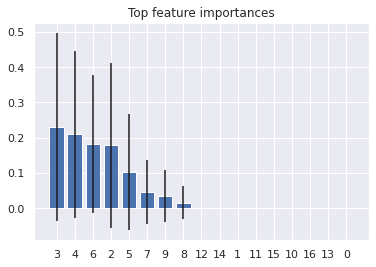

In [121]:
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

I will choose the top 10 features as they contain some offer information and customer demographic information. I will also add the last gender type remaining "F". But first I will check the corrolations between them to exclude the ones with high corrolation.

In [122]:
corrolation = combined_df[['offer_id', 'reward', 'offer_reward','offer_difficulty','offer_duration_h', 'mobile', 'social', 'web', 'F', 'M', 'O']]
corrolation.corr()

,offer_id,reward,offer_reward,offer_difficulty,offer_duration_h,mobile,social,web,F,M,O
offer_id,1.000000,0.106055,0.106055,-0.443461,-0.022170,0.499977,0.430963,-0.241416,-0.019209,0.006681,0.028963
reward,0.106055,1.000000,1.000000,0.070550,-0.466142,-0.011183,0.236036,-0.620092,0.059725,-0.031173,-0.065901
offer_reward,0.106055,1.000000,1.000000,0.070550,-0.466142,-0.011183,0.236036,-0.620092,0.059725,-0.031173,-0.065901
offer_difficulty,-0.443461,0.070550,0.070550,1.000000,0.617008,-0.864405,-0.314018,-0.061355,0.031767,-0.012487,-0.044557
offer_duration_h,-0.022170,-0.466142,-0.466142,0.617008,1.000000,-0.507796,-0.225641,0.064643,-0.019652,0.011358,0.019127
mobile,0.499977,-0.011183,-0.011183,-0.864405,-0.507796,1.000000,0.457760,-0.118285,-0.025023,0.011237,0.031845
social,0.430963,0.236036,0.236036,-0.314018,-0.225641,0.457760,1.000000,-0.258400,-0.014816,0.005854,0.020712
web,-0.241416,-0.620092,-0.620092,-0.061355,0.064643,-0.118285,-0.258400,1.000000,-0.030027,0.012854,0.039676
F,-0.019209,0.059725,0.059725,0.031767,-0.019652,-0.025023,-0.014816,-0.030027,1.000000,-0.907008,-0.209259
M,0.006681,-0.031173,-0.031173,-0.012487,0.011358,0.011237,0.005854,0.012854,-0.907008,1.000000,-0.221991


Based on the above result, reward and offer reward have a high corrolation (they are the same), therefore I will exclude one of them.

In [123]:
# Spearate the target from the predictors
X = combined_df[['offer_id', 'reward', 'offer_difficulty','offer_duration_h', 'mobile', 'social', 'web', 'F', 'M', 'O']]
y = combined_df.offer_type

In [124]:
# create training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [125]:
print("X train dataset shape for binary classification: {}".format(X_train.shape))
print("X test dataset shape for binary classification: {}".format(X_test.shape))
print("y train dataset shape for binary classification: {}".format(y_train.shape))
print("y test dataset shape for binary classification: {}".format(y_test.shape))

X train dataset shape for binary classification: (23505, 10)
X test dataset shape for binary classification: (10074, 10)
y train dataset shape for binary classification: (23505,)
y test dataset shape for binary classification: (10074,)


<a id="benchmark-model"></a>
## 6. Benchmark Model

This is a classification problem where the model predicts the offer that influences a customer. Logistic
Regression will be used as a benchmark model. It is a supervised machine learning algorithm which is
mostly used in a classification problems

In [126]:
# logistics regression
logreg = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
logreg.fit(X_train, y_train)
y_log_preds = logreg.predict(X_test)

<a id="PM"></a>
## 7. Proposed Models

Here I will build several models such as K-Nearest Neighbors (KNN), decision
tree, Support Vector Machine (SVM), XGBoost, and Light Gradient Boosting Machine (LightGBM), fit them on training dataset and predict testing data.

In [127]:
# k-nearest neighbors - knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn_preds = knn.predict(X_test)

In [128]:
# decision tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=1)
dt.fit(X_train, y_train)
y_dt_preds = dt.predict(X_test)

In [129]:
# support vector machine
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
y_svm_preds = svm.predict(X_test)

In [130]:
# XGBoost 
xgb = XGBClassifier(max_depth=1, gamma=2, eta=0.8, reg_alpha=0.5, reg_lambda=0.5)
xgb.fit(X_train, y_train)
y_xgb_preds = xgb.predict(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [131]:
# Light Gradient Boosting Machine (LightGBM)
lgbc = lgb.LGBMClassifier(objective="binary", learning_rate=0.09,max_depth=1,random_state=42)
lgbc.fit(X_train, y_train, eval_set=[(X_test, y_test),(X_train, y_train)],eval_metric='logloss')

y_lgbc_preds = lgbc.predict(X_test)

[1]	training's binary_logloss: 0.633889	valid_0's binary_logloss: 0.634533
[2]	training's binary_logloss: 0.586585	valid_0's binary_logloss: 0.586395
[3]	training's binary_logloss: 0.546616	valid_0's binary_logloss: 0.545664
[4]	training's binary_logloss: 0.51066	valid_0's binary_logloss: 0.509371
[5]	training's binary_logloss: 0.4788	valid_0's binary_logloss: 0.476931
[6]	training's binary_logloss: 0.449687	valid_0's binary_logloss: 0.447608
[7]	training's binary_logloss: 0.423739	valid_0's binary_logloss: 0.421218
[8]	training's binary_logloss: 0.39967	valid_0's binary_logloss: 0.397033
[9]	training's binary_logloss: 0.377926	valid_0's binary_logloss: 0.376066
[10]	training's binary_logloss: 0.357213	valid_0's binary_logloss: 0.355008
[11]	training's binary_logloss: 0.337536	valid_0's binary_logloss: 0.335255
[12]	training's binary_logloss: 0.319677	valid_0's binary_logloss: 0.318027
[13]	training's binary_logloss: 0.302881	valid_0's binary_logloss: 0.300957
[14]	training's binary_lo

<a id="eval"></a>
## 8. Evaluation

This section provides evaluation results of the benchmark model and the trained models over testing data; accuracy, precision, recall, F1, and Confusion Matrix is calculated.

In [132]:
# create a dataframe with all evaluation metrics for all models
def create_df(y_test, y_preds, name):
    accuracy = accuracy_score(y_test, y_preds)
    Missclassification = 1 - accuracy
    cm = confusion_matrix(y_test, y_preds)
    TN = cm[0, 0]
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    classification_measures = [accuracy, Missclassification, TP, TN, FP, FN]
    report = classification_report(y_test, y_preds,output_dict=True)
    precision_0 = report['0']['precision']
    precision_1 = report['1']['precision']
    recall_0 = report['0']['recall']
    recall_1 = report['1']['recall']
    f1_score_0 = report['0']['f1-score']
    f1_score_1 = report['1']['f1-score']
    classification_measures = [accuracy, Missclassification, TP, TN, FP, FN, precision_0, precision_1,\
                              recall_0, recall_1, f1_score_0, f1_score_1]
    m = np.asarray(classification_measures)
    df[name] = m  
    return df

In [133]:
def confusion_plot(y_preds, y_test, text):
    # converting the y_test, y_pred into an array assigned to variable "cm" 
    cm = np.array(confusion_matrix(y_test, y_preds))
    cm_lr = pd.DataFrame(cm, index=['actual_bogo', 'actual_dicount'],
                             columns=['predicted_bogo',
                                      'predicted_discount']); cm_lr
    plt.title('Confusion Matrix for\n {}'.format(text), fontweight='bold', y=1.02)
    sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, 
            fmt='', center=0, cmap="YlGnBu")
    plt.yticks(rotation=0);
    plt.show();

In [135]:
df = pd.DataFrame(index=['Accuracy', 'Missclassification', 'TP', 'TN', 'FP', 'FN', 'Precision 0',\
                                    'Precision 1', 'Recall 0', 'Recall 1','F1-score 0', 'F1-score 1'])

# logistics regression
df_eval = create_df(y_test, y_log_preds, 'Logistics Regression (Benchmark Model)')

In [136]:
# k-nearest neighbors - knn
df_eval = create_df(y_test, y_knn_preds, 'K-Nearest Neighbors')

In [137]:
# decision tree
df_eval = create_df(y_test, y_dt_preds, 'DT')

In [138]:
# SVM
df_eval = create_df(y_test, y_svm_preds, 'SVM')

In [139]:
# XGBoost
df_eval = create_df(y_test, y_xgb_preds, 'XGB')

,Logistics Regression (Benchmark Model),K-Nearest Neighbors,DT,SVM,XGB
Accuracy,1.0,1.0,0.903315,1.0,1.0
Missclassification,0.0,0.0,0.096685,0.0,0.0
TP,5298.0,5298.0,4324.000000,5298.0,5298.0
TN,4776.0,4776.0,4776.000000,4776.0,4776.0
FP,0.0,0.0,0.000000,0.0,0.0
FN,0.0,0.0,974.000000,0.0,0.0
Precision 0,1.0,1.0,0.830609,1.0,1.0
Precision 1,1.0,1.0,1.000000,1.0,1.0
Recall 0,1.0,1.0,1.000000,1.0,1.0
Recall 1,1.0,1.0,0.816157,1.0,1.0


In [140]:
# Light Gradient Boosting Machine (LightGBM)
df_eval = create_df(y_test, y_lgbc_preds, 'LightGBM')
df_eval

,Logistics Regression (Benchmark Model),K-Nearest Neighbors,DT,SVM,XGB,LightGBM
Accuracy,1.0,1.0,0.903315,1.0,1.0,1.0
Missclassification,0.0,0.0,0.096685,0.0,0.0,0.0
TP,5298.0,5298.0,4324.000000,5298.0,5298.0,5298.0
TN,4776.0,4776.0,4776.000000,4776.0,4776.0,4776.0
FP,0.0,0.0,0.000000,0.0,0.0,0.0
FN,0.0,0.0,974.000000,0.0,0.0,0.0
Precision 0,1.0,1.0,0.830609,1.0,1.0,1.0
Precision 1,1.0,1.0,1.000000,1.0,1.0,1.0
Recall 0,1.0,1.0,1.000000,1.0,1.0,1.0
Recall 1,1.0,1.0,0.816157,1.0,1.0,1.0


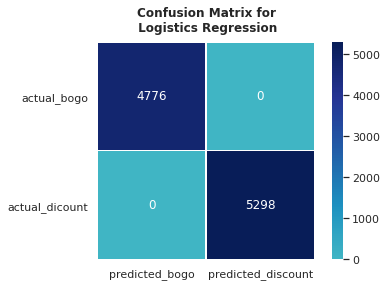

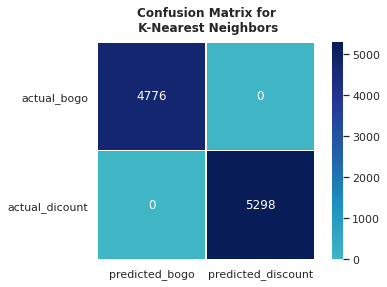

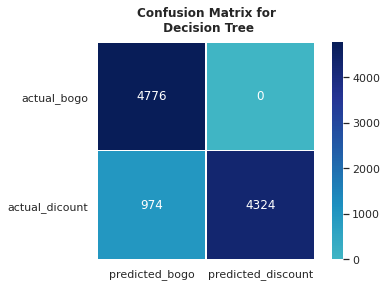

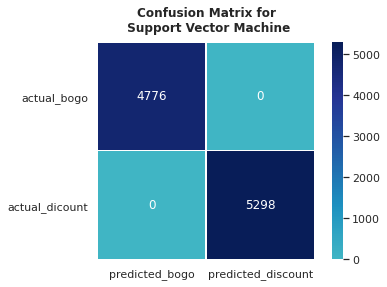

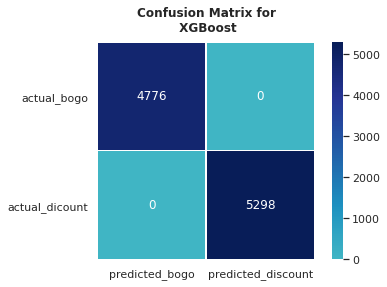

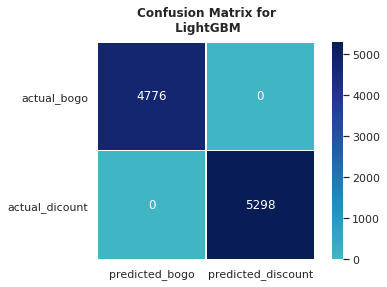

In [141]:
# plot confusion matrix for all models
confusion_plot(y_log_preds, y_test, 'Logistics Regression')
confusion_plot(y_knn_preds, y_test, 'K-Nearest Neighbors')
confusion_plot(y_dt_preds, y_test, 'Decision Tree')
confusion_plot(y_svm_preds, y_test, 'Support Vector Machine')
confusion_plot(y_xgb_preds, y_test, 'XGBoost')
confusion_plot(y_lgbc_preds, y_test, 'LightGBM')

### Multi-Class Classification

In [142]:
portfolio_multi

,offer_reward,offer_difficulty,offer_duration_h,offer_type,mobile,social,web
offer_id,,,,,,,
8,1.0,0.50,0.571429,8,1,1,0
5,1.0,0.50,0.285714,5,1,1,1
7,0.5,0.25,0.571429,7,1,0,1
1,0.5,1.00,1.000000,1,0,0,1
2,0.3,0.35,0.571429,2,1,1,1
10,0.2,0.50,1.000000,10,1,1,1
9,0.5,0.25,0.285714,9,1,1,1
3,0.2,0.50,0.571429,3,1,0,1


In [143]:
portfolio_multi['offer_type'] = portfolio_multi.index

In [144]:
portfolio_multi

,offer_reward,offer_difficulty,offer_duration_h,offer_type,mobile,social,web
offer_id,,,,,,,
8,1.0,0.50,0.571429,8,1,1,0
5,1.0,0.50,0.285714,5,1,1,1
7,0.5,0.25,0.571429,7,1,0,1
1,0.5,1.00,1.000000,1,0,0,1
2,0.3,0.35,0.571429,2,1,1,1
10,0.2,0.50,1.000000,10,1,1,1
9,0.5,0.25,0.285714,9,1,1,1
3,0.2,0.50,0.571429,3,1,0,1


In [145]:
# merge transcript dataset with multi_portfolio on offer_id
m_combined_df = transcript.merge(portfolio_multi, how = 'left', on = 'offer_id')

In [146]:
# merge m_combined_df dataset with profile on customer_id
m_combined_df = m_combined_df.merge(profile, how = 'left', on = 'customer_id')

In [147]:
m_combined_df.columns

Index(['customer_id', 'time_h', 'offer_id', 'reward', 'offer_reward',
       'offer_difficulty', 'offer_duration_h', 'offer_type', 'mobile',
       'social', 'web', 'age', 'income', 'F', 'M', 'O',
       'membership_total_days', 'membership_year'],
      dtype='object')

In [148]:
m_combined_df.isnull().sum()

customer_id              0
time_h                   0
offer_id                 0
reward                   0
offer_reward             0
offer_difficulty         0
offer_duration_h         0
offer_type               0
mobile                   0
social                   0
web                      0
age                      0
income                   0
F                        0
M                        0
O                        0
membership_total_days    0
membership_year          0
dtype: int64

In [149]:
# move offer_type column to the end of the dataset for presentation purposes only
m_combined_df = m_combined_df[[ col for col in m_combined_df.columns if col != 'offer_type' ] + ['offer_type'] ]

In [150]:
# check if dataset is balanced over the target 
m_combined_df.offer_type.value_counts()

10    5317
2     5156
7     4354
9     4296
3     4017
8     3688
1     3420
5     3331
Name: offer_type, dtype: int64

In [151]:
m_combined_df

,customer_id,time_h,offer_id,reward,offer_reward,offer_difficulty,offer_duration_h,mobile,social,web,age,income,F,M,O,membership_total_days,membership_year,offer_type
0,10702,0.0,3,0.000,0.2,0.50,0.571429,1,0,1,0.289157,0.733333,0,1,0,0.505211,2016,3
1,16909,0.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.253012,0.411111,1,0,0,0.121229,2017,10
2,6535,0.0,7,0.375,0.5,0.25,0.571429,1,0,1,0.409639,0.466667,0,1,0,0.027976,2018,7
3,6863,0.0,8,1.000,1.0,0.50,0.571429,1,1,0,0.228916,0.688889,0,1,0,0.239715,2017,8
4,9577,0.0,5,1.000,1.0,0.50,0.285714,1,1,1,0.361446,0.355556,0,1,0,0.579813,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33574,787,1.0,2,0.125,0.3,0.35,0.571429,1,1,1,0.457831,0.344444,0,1,0,0.150850,2017,2
33575,11200,1.0,2,0.125,0.3,0.35,0.571429,1,1,1,0.438476,0.393389,0,0,1,0.304992,2017,2
33576,12352,1.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.438476,0.393389,0,0,1,0.300055,2017,10
33577,8783,1.0,10,0.000,0.2,0.50,1.000000,1,1,1,0.253012,0.100000,0,1,0,0.015908,2018,10


In [152]:
# splitting the data
X_m = m_combined_df[['time_h','offer_id','reward','offer_difficulty','offer_duration_h','F', 'M', 'O']]
y_m = m_combined_df.offer_type

In [153]:
# create training and testing datasets 
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.25, random_state=42)

In [154]:
print("X train dataset shape for binary classification: {}".format(X_m_train.shape))
print("X test dataset shape for binary classification: {}".format(X_m_test.shape))
print("y train dataset shape for binary classification: {}".format(y_m_train.shape))
print("y test dataset shape for binary classification: {}".format(y_m_test.shape))

X train dataset shape for binary classification: (25184, 8)
X test dataset shape for binary classification: (8395, 8)
y train dataset shape for binary classification: (25184,)
y test dataset shape for binary classification: (8395,)


In [158]:
# Create a dataframe with simple evaluation metrics
def create_df_simple(y_test, y_preds, name):
    accuracy = accuracy_score(y_test, y_preds)
    cm = confusion_matrix(y_test, y_preds)
    TN = cm[0, 0]
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    classification_measures = [accuracy, TP, TN, FP, FN]
    m = np.asarray(classification_measures)
    df[name] = m  
    return df

In [163]:
# logistic regression
logreg = LogisticRegression(max_iter=300)

logreg.fit(X_m_train, y_m_train)

y_m_preds = logreg.predict(X_m_test)

# Running the algorithm based on specified parameters
df = pd.DataFrame(index=['Accuracy', 'TP', 'TN', 'FP', 'FN'])

df = create_df_simple(y_m_test, y_m_preds,'Logistics Regression')
df

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Logistics Regression
Accuracy,1.0
TP,1304.0
TN,810.0
FP,0.0
FN,0.0


In [164]:
knn = KNeighborsClassifier()

knn.fit(X_m_train, y_m_train)
y_m_preds = knn.predict(X_m_test)

df = create_df_simple(y_m_test, y_m_preds, 'knn')
df

,Logistics Regression,knn
Accuracy,1.0,1.0
TP,1304.0,1304.0
TN,810.0,810.0
FP,0.0,0.0
FN,0.0,0.0


In [167]:
# decision tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt.fit(X_m_train, y_m_train)
y_dt_m_preds = dt.predict(X_m_test)

df = create_df_simple(y_m_test, y_dt_m_preds, 'DT')
df

,Logistics Regression,knn,DT
Accuracy,1.0,1.0,0.564503
TP,1304.0,1304.0,1304.000000
TN,810.0,810.0,0.000000
FP,0.0,0.0,810.000000
FN,0.0,0.0,0.000000
